In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

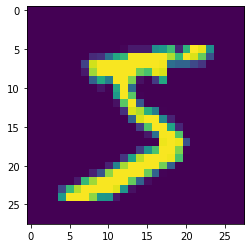

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

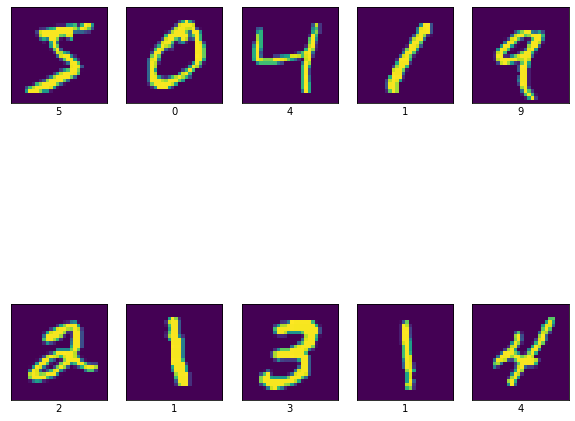

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(str(y_train[i]))
plt.show()

In [ ]:
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [ ]:
model=keras.Sequential([
                       keras.layers.Dense(input_dim = x_train.shape[1],units=128,kernel_initializer='uniform',activation='relu'),
                       
                       keras.layers.Dense(10,kernel_initializer='uniform',activation='softmax')
                       ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6156 - accuracy: 0.8510
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1822 - accuracy: 0.9466
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1175 - accuracy: 0.9647
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0830 - accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0633 - accuracy: 0.9818


In [ ]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.0973 - accuracy: 0.9705


[0.09726881235837936, 0.9704999923706055]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
prediction=model.predict(x_test)

In [ ]:
prediction[0]

array([6.0347759e-07, 1.0194194e-08, 4.6308644e-05, 1.7184160e-03,
       1.5050231e-10, 2.3883546e-05, 3.4282139e-13, 9.9819320e-01,
       1.8469480e-06, 1.5805657e-05], dtype=float32)

In [ ]:
np.argmax(prediction[0])

7

In [ ]:
y_test[0]

7